<a href="https://colab.research.google.com/github/jacmal/DataScience_Customers_Clustering/blob/main/DataScience_CLUSTERING_Online_Store_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [ ]:
import requests
import io

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show, draw, figure, cm
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from google.colab import files

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# LOADING A DATASET

  * CustomerID - unique identifier of the customer.
  * Profit - what profitability does the customer bring, value without units, the higher the value the better
  * Recency - how many days ago was the client's last order, quantity in days, the lower the value the better
  * Frequency - how often the client ordered products, value without units, the higher the value the better
  * Monetary - total value of the products ordered by the client, unit PLN, the higher the value the better
  * Variance - number of different products ordered by a client, value without a unit, the higher the value the better

  

  * CustomerID - unikalny identyfikator klienta
  * Profit - jaką profitowość przynosi klient, wartość bez jednostki, im wyższa wartość tym lepiej
  * Recency - ile dni temu było ostatnie zamówienie klienta, ilość w dniach, im niższa wartość tym lepiej
  * Frequency - jak często klient zamawiał produkty, wartość bez jednostki, im wyższa wartość tym lepiej
  * Monetary - całkowita wartość zamówionych produktów przez klienta, jednostka PLN, im wyższa wartość tym lepiej
  * Variance - ilość różnorodnych produktów, które zostały zamówione przez klienta, wartość bez jednostki, im wyższa wartość tym lepiej

In [ ]:
DATASET_URL = "https://raw.githubusercontent.com/jacmal/DataScience_Customers_Clustering/main/customers.csv"
site = requests.get(DATASET_URL).content

In [ ]:
df = pd.read_csv(io.StringIO(site.decode('utf-8')), sep=';')
df.tail()

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
1506,1507,174,18,3,"15798,92",17
1507,1508,124,28,12,"2676,89",7
1508,1509,1543,4,17,"109497,54",54
1509,1510,668,1,3,"49602,45",17
1510,1511,82,35,4,"1047,58",6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerId  1511 non-null   int64 
 1   Profit      1511 non-null   int64 
 2   Recency     1511 non-null   int64 
 3   Frequency   1511 non-null   int64 
 4   Monetary    1511 non-null   object
 5   Variance    1511 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 71.0+ KB


# DATA PREPROCESSING

## 1. Data cleaning

In [ ]:
# convert dataset "Monetary" column to "float" data type
df['Monetary'] = df['Monetary'].apply(lambda text: text.replace(',','.'))
df['Monetary'] = df['Monetary'].astype('float')
#df.set_index('CustomerId', inplace=True, drop=False)
df.head(3)

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
0,1,187,63,1,2349.06,2
1,2,96,10,6,922.62,4
2,3,47,35,4,881.22,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerId  1511 non-null   int64  
 1   Profit      1511 non-null   int64  
 2   Recency     1511 non-null   int64  
 3   Frequency   1511 non-null   int64  
 4   Monetary    1511 non-null   float64
 5   Variance    1511 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 71.0 KB


## 2. Checking the statistics of a data set.

In [ ]:
# describe the data set
df.describe().iloc[:, 1:]

,Profit,Recency,Frequency,Monetary,Variance
count,1511.000000,1511.000000,1511.000000,1.511000e+03,1511.000000
mean,1102.391132,15.847121,10.710126,1.753805e+05,16.673064
std,5457.675137,19.051823,10.348786,1.791089e+06,17.704351
min,1.000000,1.000000,1.000000,7.290000e+00,1.000000
25%,79.000000,4.000000,3.000000,1.392950e+03,5.000000
50%,224.000000,6.000000,9.000000,5.799930e+03,11.000000
75%,559.500000,19.000000,14.500000,2.228900e+04,23.000000
max,105993.000000,91.000000,79.000000,3.253994e+07,139.000000


In [ ]:
df.describe().iloc[[1,5,2], 1:]

,Profit,Recency,Frequency,Monetary,Variance
mean,1102.391132,15.847121,10.710126,1.753805e+05,16.673064
50%,224.000000,6.000000,9.000000,5.799930e+03,11.000000
std,5457.675137,19.051823,10.348786,1.791089e+06,17.704351


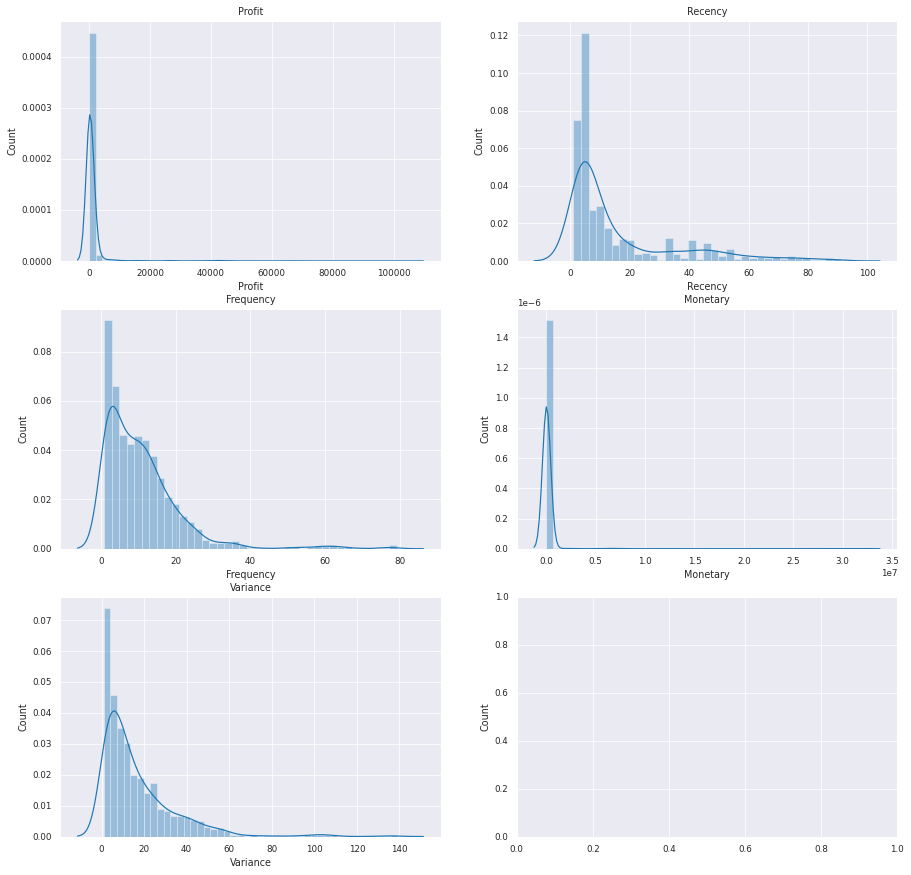

In [ ]:
# sample distribution plots for all dataset features
sns.set_style('darkgrid')
sns.set_context("paper", font_scale = 1)

fig, axs = plt.subplots(3, 2, figsize=(15,15))

sns.distplot(a=df['Profit'], ax=axs[0,0])
axs[0, 0].set_title('Profit')

sns.distplot(a=df['Recency'], ax=axs[0,1])
axs[0, 1].set_title('Recency')

sns.distplot(a=df['Frequency'], ax=axs[1,0])
axs[1, 0].set_title('Frequency')

sns.distplot(a=df['Monetary'], ax=axs[1,1])
axs[1, 1].set_title('Monetary')

sns.distplot(a=df['Variance'], ax=axs[2,0])
axs[2, 0].set_title('Variance')

for ax in axs.flat:
    ax.set(ylabel='Count')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer();

In [ ]:
# looking for features correlations
df.iloc[:, 1:].corr()

,Profit,Recency,Frequency,Monetary,Variance
Profit,1.000000,-0.093945,0.530290,0.788739,0.617295
Recency,-0.093945,1.000000,-0.439794,-0.050603,-0.363424
Frequency,0.530290,-0.439794,1.000000,0.316036,0.699699
Monetary,0.788739,-0.050603,0.316036,1.000000,0.498155
Variance,0.617295,-0.363424,0.699699,0.498155,1.000000


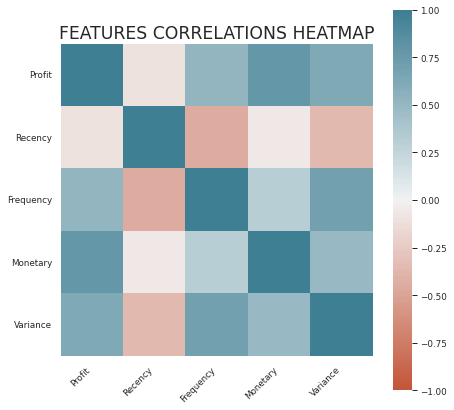

In [ ]:
# features correlation heatmap
corr = df.iloc[:, 1:].corr()

sns.set_context("paper", font_scale = 1)

fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

sns.set_context("paper", font_scale = 1.8)
plt.title('FEATURES CORRELATIONS HEATMAP');

W wyniku przeprowadzonej analizy danych, można zaobserwować, że rozkłady cech posiadają dystrybucję o pozytywnej skośności (prawostronna skośność). Wartość średnia i mediana dla poszczególnych cech są dość znacznie różne, co daje informację o istniejących w zbiorze odstających wrtościach danych ("outliers"). Istnieją też znaczne korelacje i antykorelacje miedzy cechami zbioru danych. Do idetyfikacji wartości odstających postanowiłem użyć algorytm "DBSCAN". W celu wyeliminowania korelacji i antykorelacji, oraz w celach wizualizacji zbioru danych użyty zostanie algorym "PCA".<br>
<br>
As a result of the data analysis, it can be observed that the feature distributions have a distribution with positive skewness (right skewness). The mean and median values for individual features are quite significantly different, which gives information about the existing outliers in the data set ('outliers'). There are also significant correlations and anti-correlations between the features in the dataset. I decided to use "DBSCAN" algorithm to idetify the outliers. In order to eliminate correlations and anti-correlations, and for the purpose of visualization of the dataset will be used algorithm "PCA".

## 3. Outliers Detection and PCA features engineering.

In [ ]:
# Features scalling and PCA features engineering.
## SCALER
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, 1:].values)

## PCA
n_comp = 3
pca = PCA(n_components=n_comp)
pca_data = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data = pca_data, columns = ['PCA1', 'PCA2', 'PCA3'])
df_mod = pd.concat([df, df_pca], axis=1)
df_mod

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,PCA1,PCA2,PCA3
0,1,187,63,1,2349.06,2,-1.616841,2.076503,-0.897255
1,2,96,10,6,922.62,4,-0.642528,-0.098562,0.596290
2,3,47,35,4,881.22,3,-1.096073,0.910314,-0.126520
3,4,294,5,1,3815.16,2,-0.844267,-0.103138,1.052289
4,5,732,4,31,41868.11,29,1.373494,-1.226846,-0.871992
...,...,...,...,...,...,...,...,...,...
1506,1507,174,18,3,15798.92,17,-0.496432,0.214564,0.251401
1507,1508,124,28,12,2676.89,7,-0.514823,0.374327,-0.359504
1508,1509,1543,4,17,109497.54,54,1.551456,-0.893569,-0.589191
1509,1510,668,1,3,49602.45,17,-0.218880,-0.384496,0.837938


In [ ]:
# Outliers detection by "DBSCAN" algorithm.
## DBSCAN settings
EPS = 0.5
M_SAMP = 10

## DBSCAN
dbscan = DBSCAN(eps = EPS, min_samples = M_SAMP).fit(X_scaled)
df_mod['dbscan'] = dbscan.labels_ 

dbscan_pca = DBSCAN(eps = EPS, min_samples = M_SAMP).fit(df_mod.loc[: , ['PCA1','PCA2','PCA3']])
df_mod['dbscan_pca'] = dbscan_pca.labels_

print("DBSCANs OUTLIERS DETECTION")
print('dbscan:')
print(df_mod['dbscan'].value_counts())
print('dbscan_pca:')
print(df_mod['dbscan_pca'].value_counts())

DBSCANs OUTLIERS DETECTION
dbscan:
 0    1432
-1      79
Name: dbscan, dtype: int64
dbscan_pca:
 0    1463
-1      48
Name: dbscan_pca, dtype: int64


In [ ]:
df_mod.head(3)

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,PCA1,PCA2,PCA3,dbscan,dbscan_pca
0,1,187,63,1,2349.06,2,-1.616841,2.076503,-0.897255,0,0
1,2,96,10,6,922.62,4,-0.642528,-0.098562,0.596290,0,0
2,3,47,35,4,881.22,3,-1.096073,0.910314,-0.126520,0,0


In [ ]:
# normal outliers and customers dataframes
df_outliers = df_mod[df_mod['dbscan'] == -1].copy()
df_customers = df_mod[df_mod['dbscan'] != -1].copy()

# pca outliers and customers dataframes 
df_outliers_pca = df_mod[df_mod['dbscan_pca'] == -1].copy()
df_customers_pca = df_mod[df_mod['dbscan_pca'] != -1].copy()

df_outliers.reset_index(inplace=True, drop=True)
df_customers.reset_index(inplace=True, drop=True)
df_outliers_pca.reset_index(inplace=True, drop=True)
df_customers_pca.reset_index(inplace=True, drop=True)

In [ ]:
# 3 dimensional "PCA" features plot. Dataset with detected outliers.
print(df_mod['dbscan'].value_counts())
fig = px.scatter_3d(df_mod, x='PCA1', y='PCA2', z='PCA3', size_max=1, opacity=0.5, color='dbscan', template='plotly_dark')

#print(df_mod['dbscan_pca'].value_counts())
#fig = px.scatter_3d(df_mod, x='PCA1', y='PCA2', z='PCA3', size_max=1, opacity=0.5, color='dbscan_pca', template='plotly_dark')
fig.show()

 0    1432
-1      79
Name: dbscan, dtype: int64


# DATASET CLUSTERING

## K-Mean Clustering

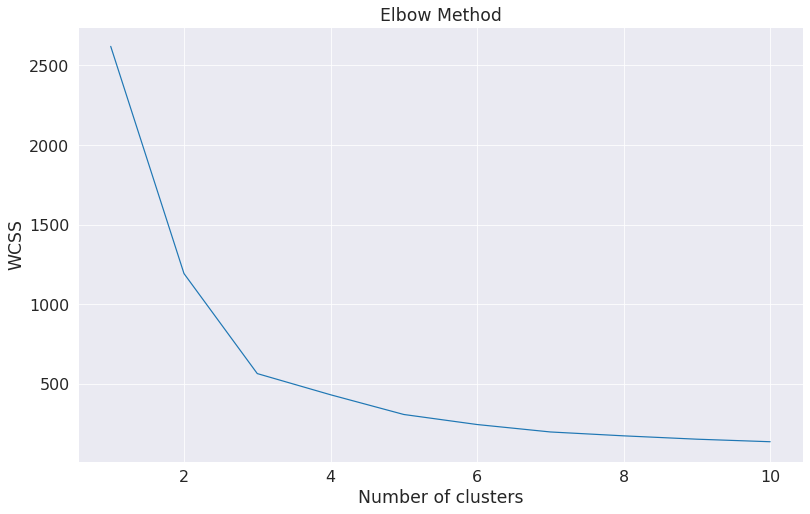

In [ ]:
# Select right number of clusters by "elbow method".
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)   
    
    # fit data without outliers
    kmeans.fit(df_customers.loc[:, ['PCA1', 'PCA2', 'PCA3']])

    wcss.append(kmeans.inertia_)

plt.figure(figsize=(13,8))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Dataset sample clustering algorithm with optimal cluster number: k=3.
updated_kmeans_model = KMeans(n_clusters = 3, 
                              init='k-means++', 
                              max_iter=500)

df_customers['cluster'] = updated_kmeans_model.fit_predict(df_customers.loc[:, ['PCA1', 'PCA2', 'PCA3']])

In [ ]:
# 3 dimensional plot of clustered dataset without outliers.
print(df_customers['cluster'].value_counts())

fig = px.scatter_3d(df_customers, x='PCA1', y='PCA2', z='PCA3', size_max=1, opacity=0.5, color='cluster', template='plotly_dark')
fig.show()

0    717
1    440
2    275
Name: cluster, dtype: int64


## Cluster Analysis

In [ ]:
class ClusterAnalizer:
    '''
    The ClusterAnalizer object contains a few functions to analize clusters.
    FUNCTION LIST:
    cluster_desc          - describe a cluster (mean, median, min, max, std)
    cluster_edges         - cluster min-max value examples by selected feature
    cluster_histograms    - display cluster histogram plots
    cluster_visualize     - display 3D scatter (3 PCA featuers) plot of selected
                            cluster
    all_cluster_visualize - display 3D scatter (3 PCA featuers) plot of all data
                            clusters
    
    ATTRIBUTES:
    df (pandas.DataFrame): 
    Customers pandas dataframe object with features -
    ('Profit','Recency','Frequency','Monetary','Variance')
    '''
    def __init__(self, df):
        self.df = df
    
    def cluster_desc(self, cluster_no, cluster_col_name='cluster'):
        '''
        Describe selected cluster.

        PARAMETERS:
        cluster_no       (int): numeric value of cluster to describe
        
        Optional parameters: default - "cluster"
        cluster_col_name (str): dataframe column name with cluster number

        RETURNS:
        pandas.DataFrame object
        Data cluster describtion with mean, median, std, min and max values.
        '''
        cluster_customers = self.df[self.df[cluster_col_name] == cluster_no].copy()
        cluster_desc = cluster_customers.describe()
        cluster_desc = cluster_desc.loc[['mean','50%','std','min','max'],
                                        ['Profit','Recency','Frequency','Monetary','Variance']]
        return cluster_desc

    def all_cluster_desc(self, features_list, cluster_col_name='cluster_text'):
        '''
        Describe all clusters.

        PARAMETERS:
        features_list    (list): list of features to create output dataframe 
        
        Optional parameters: default - "cluster_text"
        cluster_col_name (str) : dataframe column name with cluster name

        RETURNS:
        pandas.DataFrame object
        Data set describtion with mean, min and max values.
        '''
        # create a list of column names
        col_list = []
        for col_name in features_list:
            col_list.append(col_name+'_min')
            col_list.append(col_name+'_avg')
            col_list.append(col_name+'_max')
        
        # create a new DataFrame for final resault with cluster name as index
        clusters = list(set(self.df[cluster_col_name]))
        cluster_df = pd.DataFrame(columns=col_list, index=clusters)
        
        # count and add values in final result the DataFrame
        for col in col_list:
            for cluster in clusters:
                # actual cluster data
                cluster_data_df = self.df[self.df[cluster_col_name] == cluster].copy()
                col_name, func_name = col.split('_')[0], col.split('_')[1]
                
                # min, max, mean for all selected features
                if func_name == 'min':
                    val = cluster_data_df[col_name].min()
                elif func_name == 'avg':
                    val = cluster_data_df[col_name].mean()
                elif func_name == 'max':
                    val = cluster_data_df[col_name].max()
                
                # add values into the DataFrame
                cluster_df[col][cluster] = int(val)
        
        return cluster_df
    
    def cluster_edges(self, sorted_by, cluster_no, cluster_col_name='cluster'):
        '''
        Returns DataFrame with 2 rows (2 edge cases) from selected feature.
        
        PARAMETERS:
        sorted_by        (str): feature to select
        cluster_no       (int): numeric value of cluster to describe
        
        Optional parameters: default - "cluster"
        cluster_col_name (str): dataframe column name with cluster number

        RETURNS:
        2 rows pandas.DataFrame object
        '''
        cluster_customers = self.df[self.df[cluster_col_name] == cluster_no].copy()
        cluster_customers_sorted = cluster_customers.sort_values(by=sorted_by)
        cluster_customers_sorted.reset_index(inplace=True, drop=True)
        edges = cluster_customers_sorted.iloc[[0,-1] ,1:6]
        return edges

    def cluster_histograms(self, cluster_no, cluster_col_name='cluster'):
        '''
        Display cluster histograms.
        
        PARAMETERS:
        cluster_no       (int): numeric value of cluster to describe
        
        Optional parameters: default - "cluster"
        cluster_col_name (str): dataframe column name with cluster number

        RETURNS: Display Plot
        '''
        cluster_customers = self.df[self.df[cluster_col_name] == cluster_no].copy()
        sns.set_style('darkgrid')
        sns.set_context("paper", font_scale = 1)
        
        fig, axs = plt.subplots(3, 2, figsize=(15,15))

        sns.distplot(a=cluster_customers['Profit'], ax=axs[0,0])
        axs[0, 0].set_title('Profit')

        sns.distplot(a=cluster_customers['Recency'], ax=axs[0,1])
        axs[0, 1].set_title('Recency')

        sns.distplot(a=cluster_customers['Frequency'], ax=axs[1,0])
        axs[1, 0].set_title('Frequency')

        sns.distplot(a=cluster_customers['Monetary'], ax=axs[1,1])
        axs[1, 1].set_title('Monetary')

        sns.distplot(a=cluster_customers['Variance'], ax=axs[2,0])
        axs[2, 0].set_title('Variance')

        for ax in axs.flat:
            ax.set(ylabel='Count')

        # Hide x labels and tick labels for top plots and y ticks for right plots.
        #for ax in axs.flat:
        #    ax.label_outer();
    
    def cluster_visualize(self, cluster_no, cluster_col_name='cluster'):
        '''
        Display 3D (3 PCA features) cluster scatter plot. 
        
        PARAMETERS:
        cluster_no       (int): numeric value of cluster to describe
        
        Optional parameters: default - "cluster"
        cluster_col_name (str): dataframe column name with cluster number

        RETURNS: Display Plot
        '''
        cluster_customers = self.df[self.df[cluster_col_name] == cluster_no].copy()
        print(cluster_customers[cluster_col_name].value_counts())
        fig = px.scatter_3d(cluster_customers, x='PCA1', y='PCA2', z='PCA3', size_max=1, opacity=0.5, color=cluster_col_name, template='plotly_dark') # OK?
        fig.show()

    def all_cluster_visualize(self, cluster_col_name='cluster'):
        '''
        Display 3D (3 PCA features) all clusters plot.
        
        Optional parameters: default - "cluster"
        cluster_col_name (str): dataframe column name with cluster number

        RETURNS: Display Plot
        '''
        print(self.df[cluster_col_name].value_counts())
        fig = px.scatter_3d(self.df, x='PCA1', y='PCA2', z='PCA3', size_max=1, opacity=0.5, color=cluster_col_name, template='plotly_dark') # OK?
        fig.show()

In [ ]:
ca = ClusterAnalizer(df_customers.copy())

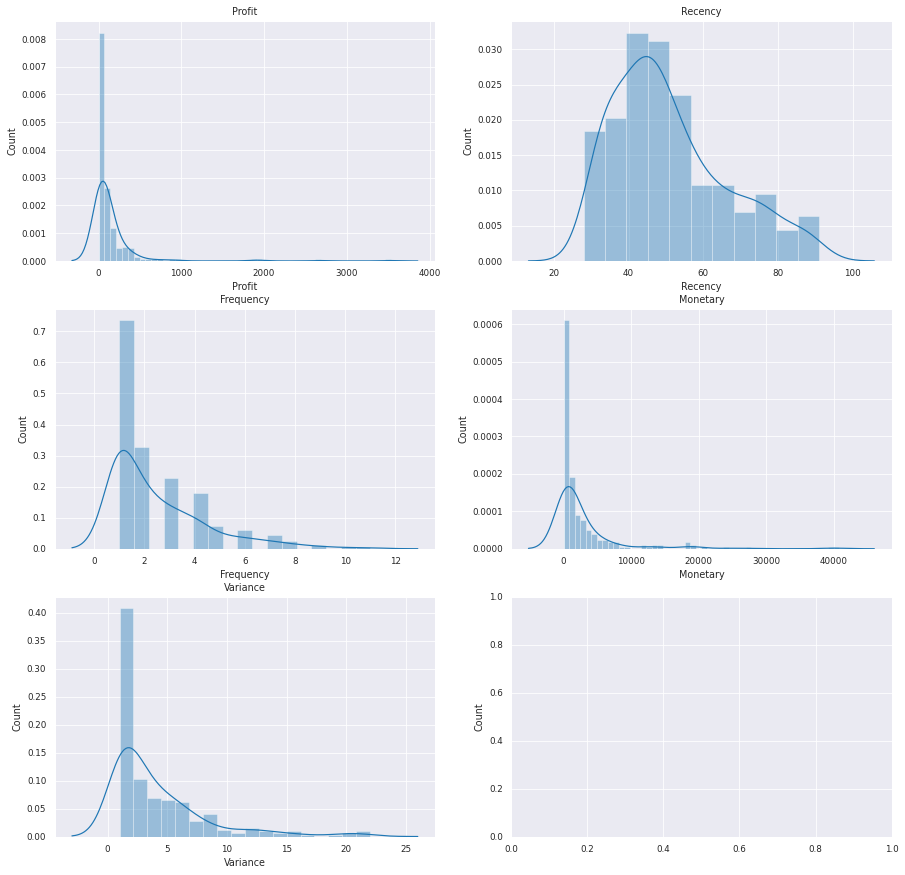

In [ ]:
ca.cluster_histograms(2)

In [ ]:
ca.cluster_desc(2)

,Profit,Recency,Frequency,Monetary,Variance
mean,137.665455,50.970909,2.516364,2724.566873,4.130909
50%,50.000000,47.000000,2.000000,856.470000,3.000000
std,330.909051,15.136576,1.937600,5328.523750,4.089905
min,1.000000,28.000000,1.000000,7.290000,1.000000
max,3535.000000,91.000000,11.000000,40820.380000,22.000000


In [ ]:
ca.cluster_edges('Profit', 2)

,Profit,Recency,Frequency,Monetary,Variance
0,1,32,1,7.29,1
274,3535,49,3,18485.51,2


In [ ]:
ca.cluster_edges('Recency', 2)

,Profit,Recency,Frequency,Monetary,Variance
0,8,28,1,362.24,2
274,50,91,1,1341.87,3


In [ ]:
ca.cluster_edges('Frequency', 2)

,Profit,Recency,Frequency,Monetary,Variance
0,187,63,1,2349.06,2
274,140,39,11,1454.78,3


In [ ]:
ca.cluster_visualize(2)

2    275
Name: cluster, dtype: int64


cluster<br>no|cluster name|customers|Recency|Frequency|Profit  
-------------|------------|---------|-------|---------|---------
0            |new         |717      |1 - 34 | 1 - 19  |2 - 2280 
1            |active      |440      |1 - 21 | 7 - 37  |74 - 3608
2            |leaving     |275      |28 - 91| 1 - 11  |1 - 3535

## Outliers - Analysis, Grouping and Add hand made clusters 

In [ ]:
# looking cluster "new" customers in outliers data set
outliers_new = df_outliers[(df_outliers['Profit'] <= 3608) & (df_outliers['Recency'] <= 34) & (df_outliers['Frequency'] <= 19)]
outliers_new_idx = outliers_new.index.to_list()
outliers_new

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,PCA1,PCA2,PCA3,dbscan,dbscan_pca
4,67,2851,10,11,467173.24,61,1.610932,-0.345890,-0.504065,-1,0
24,548,371,5,1,57359.56,47,0.482510,-0.399719,0.268849,-1,0
26,595,1176,33,13,21438.76,31,0.264103,0.438195,-0.983749,-1,0
49,1113,1423,33,11,36207.39,28,0.112157,0.542081,-0.823591,-1,0
64,1241,957,4,4,176281.29,69,1.355034,-0.614499,-0.198174,-1,0
66,1254,913,33,5,132177.97,44,0.278838,0.608710,-0.790384,-1,0


In [ ]:
df_outliers['cluster'] = -1
df_outliers['cluster'][outliers_new_idx] = 0
outliers_rest = df_outliers[df_outliers['cluster'] == -1]

In [ ]:
# looking cluster "active" customers in outliers data set
outliers_active = outliers_rest[(outliers_rest['Recency'] <= 21)  & (outliers_rest['Frequency'] >= 7) & (outliers_rest['Frequency'] <= 37) & (outliers_rest['Profit'] <= 3608)]
outliers_active_idx = outliers_active.index.to_list()
outliers_active

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,PCA1,PCA2,PCA3,dbscan,dbscan_pca,cluster
22,486,578,3,37,17547.96,27,1.582462,-1.454459,-1.110369,-1,0,-1
29,653,3564,4,36,132322.71,33,2.002941,-1.197933,-1.129437,-1,0,-1
34,797,1238,3,34,24602.59,44,2.001877,-1.434458,-1.251652,-1,0,-1
35,818,1376,3,33,73409.21,53,2.242279,-1.444157,-1.346827,-1,0,-1
43,1019,1832,4,37,54592.49,58,2.594724,-1.541037,-1.667110,-1,0,-1
45,1059,2793,3,36,97813.02,40,2.139330,-1.345461,-1.239730,-1,0,-1
55,1150,2191,7,35,55522.80,34,1.800647,-1.172763,-1.237130,-1,0,-1
68,1283,3012,6,33,79086.96,50,2.268854,-1.199468,-1.370364,-1,0,-1
74,1409,1708,7,34,60958.29,40,1.885699,-1.214425,-1.298989,-1,0,-1


In [ ]:
df_outliers['cluster'][outliers_active_idx] = 1
outliers_rest = df_outliers[df_outliers['cluster'] == -1]

In [ ]:
outliers_rest

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,PCA1,PCA2,PCA3,dbscan,dbscan_pca,cluster
0,12,58457,11,13,25965518.20,110,14.539225,9.856369,5.952013,-1,-1,-1
1,27,3858,3,52,114028.95,41,3.002181,-1.776252,-2.035778,-1,-1,-1
2,42,33273,3,62,3059273.52,96,8.507890,0.277732,-2.332575,-1,-1,-1
3,51,67669,1,77,31966480.14,134,20.621851,9.544271,4.375331,-1,-1,-1
5,68,3645,3,36,73717.29,62,2.851127,-1.449763,-1.624756,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
73,1347,10457,2,56,477034.56,52,4.218650,-1.478747,-2.210718,-1,-1,-1
75,1429,105993,2,79,12461473.65,107,18.672836,7.007973,0.126591,-1,-1,-1
76,1480,38877,2,64,4794635.85,102,9.733069,0.976120,-1.972483,-1,-1,-1
77,1486,8247,5,30,164107.06,35,2.215778,-0.666685,-0.826872,-1,0,-1


In [ ]:
# looking cluster "leaving" customers in outliers data set
outliers_leaving = outliers_rest[(outliers_rest['Recency'] >= 28) & (outliers_rest['Frequency'] <= 11) & (outliers_rest['Profit'] <= 3608)]
outliers_leaving_idx = outliers_leaving.index.to_list()
outliers_leaving

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,PCA1,PCA2,PCA3,dbscan,dbscan_pca,cluster
14,267,798,45,5,120516.10,47,0.194689,1.029351,-1.251234,-1,-1,-1
17,364,922,52,3,88554.77,28,-0.536678,1.488829,-1.056170,-1,0,-1
23,518,191,77,1,33337.59,19,-1.299295,2.493623,-1.660872,-1,0,-1
27,606,226,42,2,29800.00,23,-0.675094,1.115871,-0.606798,-1,0,-1
39,895,1070,48,4,110996.10,39,-0.099812,1.245423,-1.158948,-1,-1,-1
42,975,1306,42,7,176922.55,32,-0.049009,1.008241,-0.962165,-1,0,-1
48,1107,134,35,3,20186.64,24,-0.519264,0.804971,-0.443091,-1,0,-1


In [ ]:
df_outliers['cluster'][outliers_leaving_idx] = 2
outliers_rest = df_outliers[df_outliers['cluster'] == -1]

In [ ]:
# create a new cluster "hyper active" in outliers data set
outliers_hyper_active = outliers_rest[(outliers_rest['Profit'] <= 10000) & (outliers_rest['Recency'] <= 21)]
outliers_hyper_active_idx = outliers_hyper_active.index.to_list()
outliers_hyper_active

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,PCA1,PCA2,PCA3,dbscan,dbscan_pca,cluster
1,27,3858,3,52,114028.95,41,3.002181,-1.776252,-2.035778,-1,-1,-1
5,68,3645,3,36,73717.29,62,2.851127,-1.449763,-1.624756,-1,-1,-1
8,99,492,3,44,14273.02,20,1.690299,-1.630232,-1.336963,-1,0,-1
10,155,7631,3,58,459055.86,45,3.827189,-1.647293,-2.263278,-1,-1,-1
12,198,3899,2,37,210361.74,44,2.444535,-1.338490,-1.282210,-1,0,-1
15,336,2181,2,39,62398.89,30,1.933763,-1.456790,-1.195873,-1,0,-1
28,652,4583,1,62,146783.76,41,3.560673,-2.106478,-2.448301,-1,-1,-1
30,669,2811,3,55,51545.76,40,2.997770,-1.949358,-2.198298,-1,-1,-1
32,689,6630,4,26,286682.22,80,3.232824,-0.970436,-1.382583,-1,-1,-1
33,705,2963,3,41,71831.96,43,2.464263,-1.518169,-1.546576,-1,0,-1


In [ ]:
df_outliers['cluster'][outliers_hyper_active_idx] = 3
outliers_rest = df_outliers[df_outliers['cluster'] == -1]

In [ ]:
outliers_leaving_add = outliers_rest[outliers_rest['Profit'] <= 10000]
outliers_leaving_add_idx = outliers_leaving_add.index.to_list()
outliers_leaving_add

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,PCA1,PCA2,PCA3,dbscan,dbscan_pca,cluster
6,72,4553,49,8,105275.94,6,-0.566695,1.620619,-0.759865,-1,0,-1
11,175,6015,42,13,61685.44,10,-0.005254,1.258219,-0.836262,-1,-1,-1
13,237,7818,33,3,332032.74,6,-0.226338,1.451740,0.130950,-1,-1,-1
18,396,4438,63,1,6166031.04,57,1.890063,3.633397,-0.196529,-1,-1,-1
21,481,5505,41,10,87831.89,15,-0.024885,1.252035,-0.742078,-1,-1,-1
47,1074,6615,63,1,112525.56,1,-1.022713,2.541297,-0.762261,-1,-1,-1
70,1318,4785,54,5,35405.22,6,-0.765157,1.899372,-0.793453,-1,0,-1


In [ ]:
df_outliers['cluster'][outliers_leaving_add_idx] = 2
outliers_rest = df_outliers[df_outliers['cluster'] == -1]

In [ ]:
outliers_profitable = outliers_rest.copy()
outliers_profitable_idx = outliers_profitable.index.to_list()
outliers_profitable.head(5)

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,PCA1,PCA2,PCA3,dbscan,dbscan_pca,cluster
0,12,58457,11,13,25965518.20,110,14.539225,9.856369,5.952013,-1,-1,-1
2,42,33273,3,62,3059273.52,96,8.507890,0.277732,-2.332575,-1,-1,-1
3,51,67669,1,77,31966480.14,134,20.621851,9.544271,4.375331,-1,-1,-1
7,93,14724,4,10,795810.92,28,1.867821,0.570112,0.582274,-1,-1,-1
9,145,41189,2,65,6319742.34,103,10.397273,1.502662,-1.607856,-1,-1,-1


In [ ]:
df_outliers['cluster'][outliers_profitable_idx] = 4
outliers_rest = df_outliers[df_outliers['cluster'] == -1]

In [ ]:
outliers_rest

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,PCA1,PCA2,PCA3,dbscan,dbscan_pca,cluster


In [ ]:
#print(df_mod['cluster_scaled'].value_counts())
print(df_outliers['cluster'].value_counts())

#fig = px.scatter_3d(df_mod, x='PCA1', y='PCA2', z='PCA3', size_max=1, opacity=0.5, color='cluster_scaled', template='plotly_dark')
fig = px.scatter_3d(df_outliers, x='PCA1', y='PCA2', z='PCA3', size_max=1, opacity=0.5, color='cluster', template='plotly_dark') # OK?
fig.show()

4    26
3    24
2    14
1     9
0     6
Name: cluster, dtype: int64


## Concatenate customers and outliers data to a single dataframe.

In [ ]:
df_ready = pd.concat([df_customers, df_outliers], ignore_index=True, sort=False)

In [ ]:
#print(df_mod['cluster_scaled'].value_counts())
print(df_ready['cluster'].value_counts())

#fig = px.scatter_3d(df_mod, x='PCA1', y='PCA2', z='PCA3', size_max=1, opacity=0.5, color='cluster_scaled', template='plotly_dark')
fig = px.scatter_3d(df_ready, x='PCA1', y='PCA2', z='PCA3', size_max=1, opacity=0.5, color='cluster', template='plotly_dark') # OK?
fig.show()

0    723
1    449
2    289
4     26
3     24
Name: cluster, dtype: int64


In [ ]:
data_clusters = {
    0: 'new',
    1: 'active',
    2: 'leaving',
    3: 'profitable',
    4: 'best'
}

df_ready['cluster_text'] = df_ready['cluster'].apply(lambda x: data_clusters[x])

In [ ]:
df_ready

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,PCA1,PCA2,PCA3,dbscan,dbscan_pca,cluster,cluster_text
0,1,187,63,1,2349.06,2,-1.616841,2.076503,-0.897255,0,0,2,leaving
1,2,96,10,6,922.62,4,-0.642528,-0.098562,0.596290,0,0,0,new
2,3,47,35,4,881.22,3,-1.096073,0.910314,-0.126520,0,0,2,leaving
3,4,294,5,1,3815.16,2,-0.844267,-0.103138,1.052289,0,0,0,new
4,5,732,4,31,41868.11,29,1.373494,-1.226846,-0.871992,0,0,1,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,1409,1708,7,34,60958.29,40,1.885699,-1.214425,-1.298989,-1,0,1,active
1507,1429,105993,2,79,12461473.65,107,18.672836,7.007973,0.126591,-1,-1,4,best
1508,1480,38877,2,64,4794635.85,102,9.733069,0.976120,-1.972483,-1,-1,4,best
1509,1486,8247,5,30,164107.06,35,2.215778,-0.666685,-0.826872,-1,0,3,profitable


In [ ]:
ca = ClusterAnalizer(df_ready)

In [ ]:
cluster_describtion = ca.all_cluster_desc(['Profit', 'Recency', 'Frequency'])

In [ ]:
df_ready.to_csv('customers_ready.csv')
cluster_describtion.to_csv('cluster_describtion.csv')
files.download('customers_ready.csv')
files.download('cluster_describtion.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(df_ready['cluster_text'].value_counts())

fig = px.scatter_3d(df_ready, x='PCA1', y='PCA2', z='PCA3', size_max=1, opacity=0.5, color='cluster_text', template='plotly_dark')
fig.show()

new           723
active        449
leaving       289
best           26
profitable     24
Name: cluster_text, dtype: int64
